In [0]:
import numpy as np 
import pandas as pd 
np.set_printoptions(suppress=True)


In [0]:
def getEdgeLabel(drugId,proteinId,edgearray):
    
    return edgearray[drugId,proteinId]

ed = np.loadtxt('mat_drug_protein.txt',dtype='int')

def average(Drug,Protein):
    global ed
    avg = np.empty((len(Drug)*len(Protein),Drug.shape[1]+3))
    ii=0
    for k,i in enumerate(Drug):
        for kk,j in enumerate(Protein):
            avg[ii]=np.concatenate((np.array([k,kk,getEdgeLabel(k,kk,ed)]),np.add(i,j)/2))
            ii+=1
        

    return avg
  
def hadamard(Drug,Protein):
    global ed
    hadamard = np.empty((len(Drug)*len(Protein),Drug.shape[1]+3))
    ii=0
    for k,i in enumerate(Drug):
        for kk,j in enumerate(Protein):
            hadamard[ii]=np.concatenate((np.array([k,kk,getEdgeLabel(k,kk,ed)]),np.multiply(i,j)))
            ii+=1
        

    return hadamard
  
def weightedL1(Drug,Protein):
    global ed
    wl1 = np.empty((len(Drug)*len(Protein),Drug.shape[1]+3))
    ii=0
    for k,i in enumerate(Drug):
        for kk,j in enumerate(Protein):
            wl1[ii]=np.concatenate((np.array([k,kk,getEdgeLabel(k,kk,ed)]),np.absolute(np.subtract(i,j))))
            ii+=1
    return wl1

def weightedL2(Drug,Protein):
    global ed
    wl2 = np.empty((len(Drug)*len(Protein),Drug.shape[1]+3))
    ii=0
    for k,i in enumerate(Drug):
        for kk,j in enumerate(Protein):
            wl2[ii]=np.concatenate((np.array([k,kk,getEdgeLabel(k,kk,ed)]),np.power(np.absolute(np.subtract(i,j)),2)))
            ii+=1
    return wl2  
  
  

In [0]:
drug = np.loadtxt('drug_vector_d.txt')
protein = np.loadtxt('protein_vector_d.txt')


In [0]:
avg = average(drug,protein)
hadamard = hadamard(drug,protein)
wl1 = weightedL1(drug,protein)
wl2 = weightedL2(drug,protein)

In [0]:
np.savetxt('hadamardedgefeature.txt',hadamard,fmt="%1.2f")
np.savetxt('avgedgefeature.txt',avg,fmt="%1.2f")
np.savetxt('wl1edgefeature.txt',wl1,fmt="%1.2f")
np.savetxt('wl2edgefeature.txt',wl2,fmt="%1.2f")

In [0]:
def array2Df(arr):
  df = pd.DataFrame(data=arr)
  df.rename(columns={0: "drugId", 1: "proteinId",2:"label"},inplace=True)
  df.drugId = df.drugId.astype('int')
  df.proteinId = df.proteinId.astype('int')
  df.label = df.label.astype('int')
  return df
  
avgDF = array2Df(avg)
hadamardDF = array2Df(hadamard)
wl1DF = array2Df(wl1)
wl2DF  = array2Df(wl2)

In [0]:
hadamardDF.head()

,drugId,proteinId,label,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130
0,0,0,0,0.609020,-0.014511,-0.038703,-0.151778,0.013296,-0.047366,0.200271,0.160973,0.010110,0.031499,0.045637,0.003605,0.046952,0.023857,0.022251,0.027013,0.015187,0.012401,0.045957,0.010813,0.008183,0.002359,0.006674,0.002810,0.001156,0.006592,0.030265,0.004642,0.004037,0.003970,0.006301,0.001742,0.000363,0.008689,0.000591,0.006299,0.005769,...,0.000784,0.009709,0.005906,0.001676,0.001915,0.000067,0.002642,0.004669,0.014957,0.001941,0.017709,0.003369,0.001997,0.001920,0.004840,0.004324,0.007833,0.004023,0.010591,0.003016,0.002129,0.002609,0.000087,0.001575,0.022988,0.000622,0.000257,0.000013,0.002165,0.011139,0.002919,0.002401,0.008093,0.000087,0.006459,0.000253,0.003814,0.002908,0.000550,0.001723
1,0,1,0,0.583385,-0.101044,-0.127861,0.328072,0.004419,0.005677,-0.041226,0.006074,-0.017687,0.000234,0.032590,-0.005136,-0.005420,-0.006017,-0.010917,-0.006787,-0.014523,0.014943,-0.054350,-0.041762,0.006349,-0.003444,0.002198,-0.001312,-0.001517,-0.024699,0.007336,-0.011537,-0.010023,-0.008362,-0.019737,-0.001378,0.000238,0.003373,-0.002387,0.022112,0.018505,...,0.002885,-0.036032,-0.015878,0.002323,-0.005164,-0.000549,-0.000748,0.023345,0.014402,0.004965,-0.120283,-0.009658,0.007464,0.003459,0.000234,0.009018,-0.005205,0.025158,0.024346,-0.000984,0.002836,-0.001029,0.004645,-0.004491,0.012534,0.002196,-0.000550,0.000139,0.001060,-0.060937,-0.039576,-0.005328,-0.005045,0.000321,-0.001423,0.008867,0.006020,0.005278,0.005417,-0.004394
2,0,2,0,0.587165,0.203795,-0.023105,-0.149747,-0.005700,-0.028449,0.004795,0.013016,-0.000644,-0.005051,0.015889,0.000679,-0.036002,-0.014215,0.013410,-0.002970,0.006079,0.006025,-0.094137,0.005493,0.036255,0.008043,-0.026300,-0.009227,0.000868,0.031465,0.032648,0.032634,-0.003178,-0.007566,-0.016311,0.006788,-0.001661,-0.001492,-0.007020,0.000078,-0.009960,...,-0.002112,-0.016889,0.013619,-0.003742,0.009058,-0.000514,-0.003062,0.005901,0.006861,-0.000644,0.035288,-0.012005,-0.003159,0.005598,0.002288,-0.006272,0.014688,-0.002822,0.015779,-0.002029,-0.002568,0.002402,-0.002120,-0.003940,0.033263,0.000791,0.000266,-0.000486,-0.021610,-0.021376,-0.042917,-0.006099,0.001691,-0.002752,0.024610,0.002838,0.002107,0.000387,0.003178,-0.004330
3,0,3,0,0.553985,-0.241403,0.012532,-0.038860,-0.002110,-0.000008,-0.040002,-0.022447,-0.003530,0.001634,0.002357,0.000960,-0.000161,-0.005273,0.003575,-0.000502,-0.002395,-0.000331,0.003022,0.002853,0.000633,0.000376,-0.000089,0.000091,-0.000124,-0.003864,0.000091,0.001819,0.000451,0.000158,0.000573,-0.000339,-0.000005,-0.001146,-0.000083,-0.001131,-0.000696,...,0.000138,0.003579,0.000096,0.000183,-0.000362,0.000003,0.000330,0.000816,0.000788,0.000148,-0.003353,-0.000393,-0.000402,0.000038,0.001349,0.000190,0.000258,-0.003355,0.001870,0.000513,-0.000205,0.000822,0.000139,-0.001065,-0.001729,-0.000259,-0.000266,-0.000184,0.000072,-0.002263,-0.004299,0.000259,0.000995,-0.000580,-0.003478,0.000350,-0.000806,0.000260,0.002217,-0.000342
4,0,4,0,0.543476,-0.240151,0.012165,-0.043952,-0.001673,0.000746,-0.030590,-0.007900,-0.001471,0.000441,0.001961,0.000404,-0.002735,-0.002920,0.002706,-0.002163,-0.001634,0.000252,-0.001683,0.001461,0.001054,0.000671,-0.000153,0.000108,-0.000193,-0.005359,0.000195,0.002861,0.000630,-0.000735,0.000584,-0.000335,0.000022,-0.000982,0.000811,-0.001540,-0.000451,...,0.000412,-0.000935,0.000452,0.000407,-0.000471,0.000101,-0.000375,-0.000007,0.000449,0.000593,-0.000313,-0.000751,-0.002203,-0.000323,0.001829,0.000828,-0.003045,-0.001031,-0.000500,-0.000515,0.001579,-0.000470,0.000327,0.000011,-0.003719,-0.000694,-0.000199,-0.000148,0.000978,-0.007366,-0.004059,-0.000969,-0.000702,0.001235,-0.006949,0.000650,-0.000386,-0.001187,0.004733,-0.000493


In [0]:
avgDF.label.value_counts()

0    1068573
1       1923
Name: label, dtype: int64

In [0]:
avgDF1 = pd.concat([avgDF[avgDF['label']==0].sample(4000,random_state=42),avgDF[avgDF['label']==1]])
hadamardDF1 = pd.concat([hadamardDF[hadamardDF['label']==0].sample(4000,random_state=42),hadamardDF[hadamardDF['label']==1]])
wl1DF1 = pd.concat([wl1DF[wl1DF['label']==0].sample(4000,random_state=42),wl1DF[wl1DF['label']==1]])
wl2DF1 = pd.concat([wl2DF[wl2DF['label']==0].sample(4000,random_state=42),wl2DF[wl2DF['label']==1]])

In [0]:
wl2DF1.head()

,drugId,proteinId,label,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130
485851,321,499,0,0.034811,0.093304,0.013731,0.762083,0.271267,0.195840,0.010814,0.150110,0.047032,0.049275,0.020545,0.055897,0.080387,0.221869,0.001192,0.011621,1.420983e-01,0.269771,0.072840,0.020401,0.030201,0.000326,0.062639,0.139075,0.147730,0.315757,0.031490,0.014628,0.005092,0.314347,0.007748,0.023249,0.004363,0.000049,0.116033,0.011558,0.018845,...,0.000010,0.017157,0.251754,0.000525,0.073590,0.028455,0.025262,0.021688,0.070338,0.023325,0.024780,0.024467,0.000135,0.048434,0.166949,0.184827,0.012008,0.146903,0.034981,0.008842,0.015179,0.031919,0.028631,0.004709,0.009525,0.371569,0.011628,0.000790,0.001636,0.014344,0.222017,0.016305,0.004807,0.010153,0.010429,0.000743,0.045646,0.021134,0.043560,2.606715e-07
82086,54,438,0,0.001690,0.005035,0.001866,0.124079,0.008522,0.116525,0.058813,0.007833,0.322095,0.000523,0.679407,0.001298,0.395415,0.053702,0.003135,0.035079,3.310297e-01,0.384596,0.015393,0.443973,0.000815,0.205935,0.030864,0.029582,0.054683,0.346411,0.001839,0.015181,0.040285,0.000015,0.000288,0.000018,0.000156,0.038807,0.059797,0.098833,0.001303,...,0.003822,0.004165,0.120139,0.000790,0.000349,0.065130,0.005667,0.001058,0.000483,0.014930,0.003974,0.254716,0.000314,0.013926,0.063431,0.009439,0.002947,0.184528,0.042361,0.000100,0.031172,0.000270,0.008845,0.036826,0.000677,0.000015,0.035415,0.102844,0.014454,0.011610,0.037394,0.100437,0.059454,0.029332,0.093997,0.007204,0.057831,0.006912,0.003232,3.458028e-03
883705,584,697,0,0.029761,2.212132,0.109552,0.070983,0.300596,0.000477,0.058983,0.086349,0.038127,0.005117,0.248711,0.003475,0.058075,0.152714,0.000018,0.016870,1.221642e-07,0.048939,0.086358,0.004957,0.002328,0.321021,0.077508,0.198112,0.008735,0.003711,0.037712,0.101457,0.083737,0.242802,0.344082,0.030495,0.070608,0.119825,0.066534,0.022223,0.057786,...,0.000972,0.135999,0.045281,0.073104,0.000148,0.019066,0.002491,0.015630,0.054280,0.019341,0.020282,0.016982,0.004070,0.007337,0.006211,0.008241,0.000106,0.024456,0.000512,0.000668,0.012596,0.005712,0.069203,0.035250,0.003128,0.022535,0.001156,0.041395,0.000177,0.025869,0.005729,0.010725,0.000583,0.033718,0.055746,0.014497,0.043212,0.029081,0.027543,3.400933e-04
604522,399,1234,0,0.119261,0.083460,0.488646,0.001082,0.007049,0.008341,0.040622,0.008334,0.002556,0.044746,0.153126,0.003177,0.095408,0.479698,0.024270,0.224115,5.739784e-02,0.089938,0.392506,0.091348,0.011399,0.039118,0.087830,0.103330,0.001334,0.058471,0.000411,0.000434,0.370992,0.044280,0.013550,0.008424,0.005224,0.005994,0.013983,0.002369,0.002548,...,0.018159,0.034855,0.119514,0.014186,0.200182,0.211717,0.000606,0.063760,0.335957,0.011558,0.000098,0.230799,0.008820,0.137101,0.121577,0.073353,0.044774,0.479960,0.044081,0.005894,0.004808,0.037865,0.038338,0.087926,0.413509,0.096519,0.148465,0.000940,0.006635,0.010824,0.000527,0.415850,0.029880,0.000479,0.041103,0.177035,0.085423,0.009323,0.002287,1.207479e-01
1035576,684,1368,0,0.018704,0.097991,0.251112,0.002790,0.057568,0.029446,0.234843,0.429089,0.004842,0.072934,0.145846,0.082318,0.019786,0.039181,0.011934,0.000792,1.424376e-01,0.145407,0.043953,0.162056,0.050408,0.000618,0.005348,0.111851,0.001044,0.005037,0.017434,0.000755,0.005920,0.004055,0.010474,0.000427,0.000688,0.034506,0.006822,0.013514,0.077351,...,0.027448,0.008941,0.019465,0.003075,0.006022,0.009648,0.056920,0.002468,0.032556,0.006502,0.000577,0.002483,0.000269,0.026505,0.006250,0.000141,0.091905,0.022190,0.031616,0.000172,0.002412,0.000692,0.018032,0.044492,0.013716,0.000602,0.007265,0.040633,0.024736,0.033853,0.014177,0.021880,0.005218,0.000755,0.004393,0.069465,0.004300,0.002121,0.103638,1.095505e-02


In [0]:
avgDF1.set_index(['drugId','proteinId'],inplace=True)
hadamardDF1.set_index(['drugId','proteinId'],inplace=True)
wl1DF1.set_index(['drugId','proteinId'],inplace=True)
wl2DF1.set_index(['drugId','proteinId'],inplace=True)

In [0]:
wl2DF1.sample(5)

,,label,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130
drugId,proteinId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
206,1223,0,0.051438,1.432052,0.132436,0.041337,0.014390,0.073661,0.042829,0.006362,0.075509,0.019025,0.279664,0.000655,0.005947,0.001693,0.029447,0.117212,0.010439,0.012064,0.131806,0.000996,0.017098,0.002591,0.001860,0.503273,0.098760,0.235911,0.007913,0.019375,0.055922,0.028228,0.024495,0.156658,0.000261,0.002772,0.000772,0.057767,0.071061,0.000836,0.049459,...,0.000108,0.124660,0.015707,0.069032,0.052323,0.061512,0.004815,0.013160,0.019203,0.042247,0.000864,4.608629e-02,0.003936,0.006272,0.000025,0.032250,0.032780,1.020493e-03,0.050089,0.047460,0.017000,0.049737,0.003082,0.058916,0.501307,0.008373,0.075032,0.353296,0.000051,0.028103,0.001331,0.049958,0.002381,0.000621,0.076688,0.056760,0.027601,0.010896,0.093762,2.104240e-01
551,626,0,0.005887,0.179520,0.338140,0.008879,0.052785,0.050018,0.013648,0.040120,0.000258,0.242863,0.000146,0.009710,0.008431,0.156972,0.385751,0.017640,0.133378,0.006617,0.048248,0.001702,0.000093,0.303569,0.154880,0.003132,0.232954,0.011580,0.293063,0.109491,0.044995,0.558819,0.346753,0.000389,0.008377,0.000782,0.020027,0.010237,0.052248,0.015734,0.004033,...,0.004114,0.008471,0.021771,0.022245,0.012728,0.044742,0.099451,0.015907,0.011640,0.003893,0.035479,2.038929e-03,0.005907,0.018745,0.000572,0.014492,0.000005,2.148697e-02,0.086889,0.000047,0.031959,0.000787,0.034663,0.101754,0.002441,0.032450,0.134533,0.270115,0.465953,0.121764,0.243174,0.006564,0.000225,0.038711,0.032591,0.060493,0.010304,0.013676,0.008107,6.215746e-07
340,164,1,0.046850,0.597575,0.158729,0.563252,0.015041,0.090846,0.498332,0.002564,0.065861,0.236410,0.050400,0.072616,0.207924,0.029087,0.270478,0.017854,0.044172,0.351954,0.090856,0.056157,0.575070,0.298509,0.042412,0.038860,0.018885,0.021916,0.068430,0.094347,0.011978,0.671849,0.048168,0.012406,0.078674,0.134731,0.191164,0.017122,0.001189,0.008846,0.008896,...,0.000469,0.003998,0.001323,0.024761,0.035725,0.047413,0.000031,0.010732,0.009137,0.006195,0.006845,1.819601e-02,0.017994,0.000264,0.000548,0.079759,0.046987,3.411603e-02,0.015368,0.000628,0.004434,0.008954,0.000226,0.006489,0.005902,0.037218,0.000489,0.024581,0.028523,0.099762,0.006531,0.057128,0.048166,0.003839,0.003815,0.037729,0.018917,0.084831,0.016727,8.162963e-06
553,402,1,0.058897,0.534489,0.132754,0.000749,0.000128,0.024437,0.006474,0.000078,0.022063,0.352944,0.055885,0.026432,0.057869,0.033481,0.001049,0.027922,0.010261,0.011598,0.017966,0.207846,0.068987,0.028838,0.002725,0.001699,0.008411,0.000133,0.014386,0.010598,0.051099,0.001995,0.000569,0.096949,0.001688,0.095046,0.033169,0.002957,0.024702,0.003202,0.024989,...,0.022761,0.000343,0.001375,0.011069,0.007624,0.000959,0.000006,0.000580,0.000031,0.017022,0.000079,6.555197e-02,0.011598,0.025901,0.008694,0.002345,0.007918,2.272858e-08,0.008229,0.000432,0.001606,0.003329,0.000793,0.025178,0.000895,0.001449,0.005105,0.003422,0.010168,0.013496,0.011006,0.011123,0.003498,0.011976,0.000342,0.000834,0.005713,0.046227,0.031124,1.384891e-02
573,742,1,0.027523,0.000261,0.664506,0.263881,0.847358,0.003219,0.031033,0.010900,0.287437,0.595312,0.062948,0.033281,0.489611,1.187224,0.002572,0.006977,0.029917,0.021031,0.001073,0.315104,0.280786,0.042072,0.111784,0.000914,0.086294,0.072427,0.008171,0.137668,0.006868,0.000223,0.009448,0.000090,0.126868,0.000198,0.000083,0.264038,0.025073,0.963833,0.028061,...,0.004602,0.070290,0.000017,0.022745,0.061291,0.030977,0.009069,0.035709,0.169466,0.029064,0.085301,2.282214e-08,0.005918,0.047891,0.011151,0.000398,0.012406,3.211064e-02,0.008295,0.017519,0.000420,0.015514,0.043346,0.027786,0.071676,0.004347,0.002240,0.000060,0.001140,0.031442,0.090691,0.120271,0.026002,0.002456,0

In [0]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
from scipy import interp



In [0]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
aclist = []

classifiers = [
    KNeighborsClassifier(4),
    SVC(kernel="linear", C=0.05),
    SVC(C= 1000, gamma= 0.01, kernel= 'rbf'),
    GaussianProcessClassifier(1.0 * RBF(1.2)),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
for ndf,df in zip(['Average','Hadamard','Weighted-L1','Weighted-L2'],[avgDF1,hadamardDF1,wl1DF1,wl2DF1]):
    kf=StratifiedKFold(n_splits=2, shuffle=True,random_state=42)
    print('################')
    print('performance of the '+ndf+' operator')
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.33, random_state=42)
    for name, clf in zip(names, classifiers):
             scores=cross_val_score(clf, df.iloc[:,1:], df.iloc[:,0],scoring='roc_auc', cv=kf)
             print(name)
             print(np.mean(scores))
             aclist.append([ndf,np.mean(scores),name,clf])
             

################
performance of the Average operator
Nearest Neighbors
0.8090246193273638
Linear SVM
0.738878520620196
RBF SVM
0.8501209566546456
Gaussian Process
0.856966811414392
Decision Tree
0.6502457274722493
Random Forest
0.6891691617576112
Neural Net
0.8047859736587625
AdaBoost
0.734867225646362
Naive Bayes
0.7481094583236882
QDA
0.8327363115236425
################
performance of the Hadamard operator
Nearest Neighbors
0.6782651218466125
Linear SVM
0.5825273720851244
RBF SVM
0.6142210551422311
Gaussian Process
0.7048275042131702
Decision Tree
0.5956312878455178
Random Forest
0.6167871482354443
Neural Net
0.6089419653384274
AdaBoost
0.673367877768307
Naive Bayes
0.6790601830268194
QDA
0.6797317121912596
################
performance of the Weighted-L1 operator
Nearest Neighbors
0.7856579827946892
Linear SVM
0.7072548359513761
RBF SVM
0.8054429588677768
Gaussian Process
0.8107339096380459
Decision Tree
0.5969336777243905
Random Forest
0.606769693055138
Neural Net
0.7686311729162927

In [0]:
import seaborn as sns

In [0]:


acdf = pd.DataFrame.from_records([x for x in aclist if x[2] in ['Nearest Neighbors','RBF SVM','Neural Net','Gaussian Process'] ],columns=['DF_name','AUC_ROC','Classifier','clf'])
             

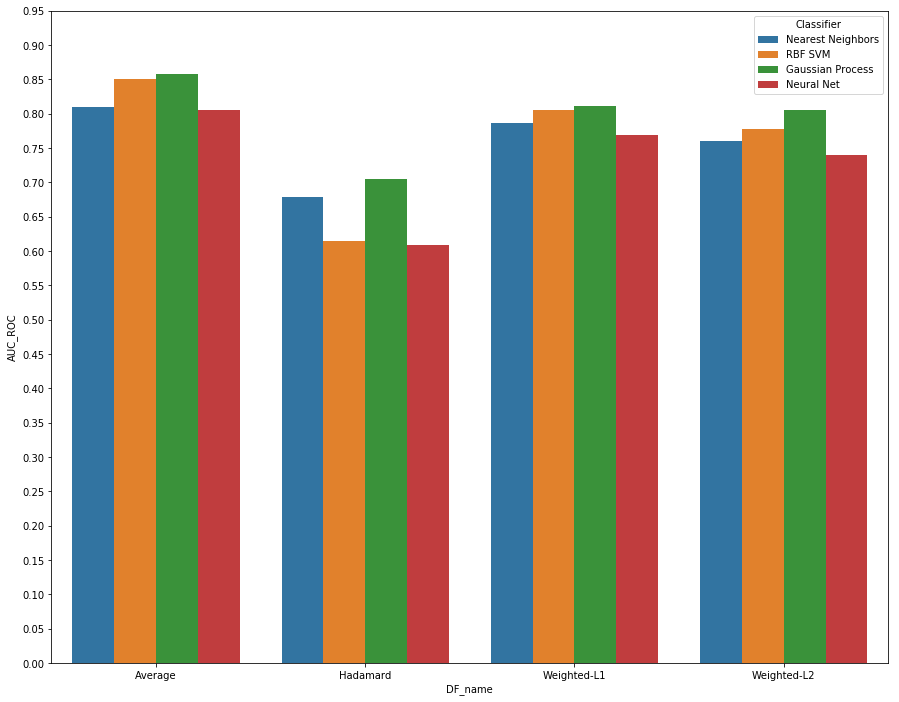

In [0]:
f,ax = plt.subplots(figsize=(15,12))
sns.barplot(x="DF_name", y="AUC_ROC", hue="Classifier", data=acdf)
plt.setp(ax,yticks=np.arange(0, 1, 0.05)) 
plt.show()

In [0]:
clist = [x[:3] for x in aclist if x[2] in ['Nearest Neighbors','RBF SVM','Neural Net','Gaussian Process']][:4]
clist = [[x[-1]+' on Avg_Dataset',x[1]] for x in clist] 
clist.append(['DTInet',0.89])
clist.append(['CMF',0.77])
clist.append(['HNM',0.85])
clist.append(['NetLapRLS',0.82])
clist.append(['BLMNII',0.6])
clist

[['Nearest Neighbors on Avg_Dataset', 0.8090246193273638],
 ['RBF SVM on Avg_Dataset', 0.8501209566546456],
 ['Gaussian Process on Avg_Dataset', 0.856966811414392],
 ['Neural Net on Avg_Dataset', 0.8047859736587625],
 ['DTInet', 0.89],
 ['CMF', 0.77],
 ['HNM', 0.85],
 ['NetLapRLS', 0.82],
 ['BLMNII', 0.6]]

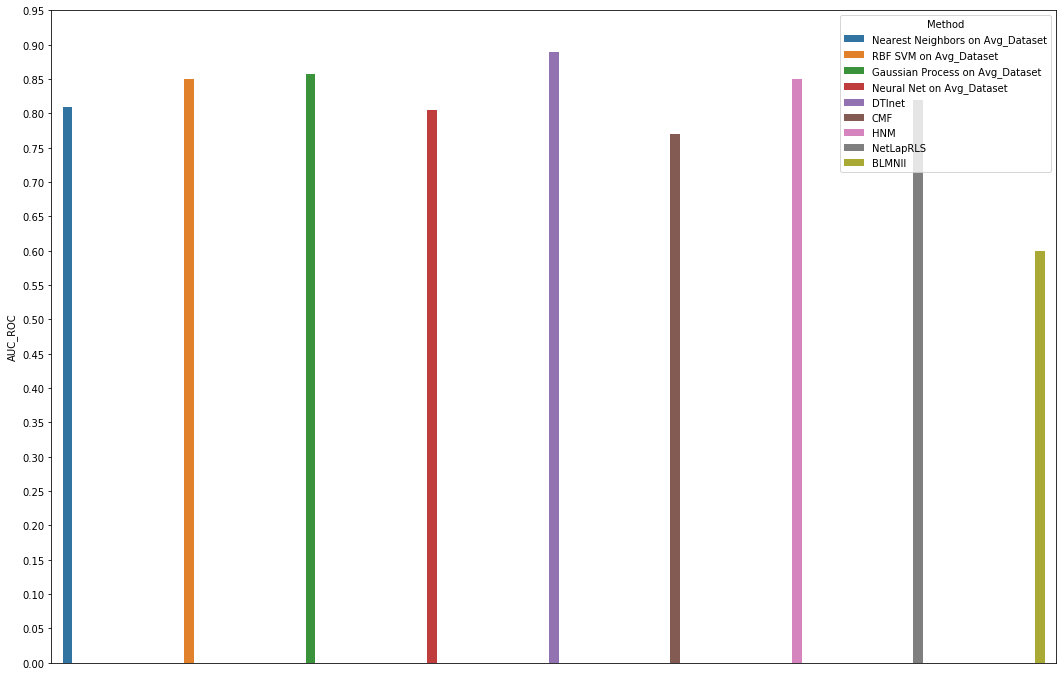

In [0]:
acdf1 = pd.DataFrame.from_records(clist,columns=['Method','AUC_ROC'])
f,ax = plt.subplots(figsize=(18,12))
sns.barplot(x="Method", y="AUC_ROC", hue="Method", data=acdf1)
plt.setp(ax,yticks=np.arange(0, 1, 0.05)) 
ax.get_xaxis().set_visible(False)#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [0]:
dff = avgDF.set_index(['drugId','proteinId'])[~avgDF.index.isin(avgDF1.index)].sample(1000,random_state=8)
dff.label.value_counts()

0    1000
Name: label, dtype: int64

In [0]:
y_pred = np.empty((4,1000))
for i in range(4):
     y_pred[i] = acdf.clf[i].fit(avgDF1.iloc[:,1:],avgDF1.iloc[:,0]).predict(dff.iloc[:,1:])

In [0]:
dfy = {}
for x in range(4):
    dfy['df'+str(x)] = dff.copy()
    dfy['df'+str(x)].label = [int(i) for i in y_pred[x]]
dfy

{'df0':                   label         3         4  ...       128       129       130
 drugId proteinId                             ...                              
 639    1354           1 -0.836319 -0.325987  ... -0.032152 -0.078511  0.061405
 506    635            1 -0.932538 -0.045916  ... -0.014572  0.037629 -0.042363
 173    676            0 -0.831159  0.018865  ...  0.092870  0.025616 -0.034374
 459    1495           0 -0.720496 -0.059290  ... -0.141014 -0.111923  0.099729
 407    729            0 -0.894521  0.173097  ... -0.024854 -0.031912  0.002652
 40     471            0 -0.928237  0.438157  ...  0.050728  0.001156 -0.035013
 190    1304           0 -0.915596 -0.121310  ...  0.003145  0.072952  0.034653
 500    500            0 -0.826145 -0.380069  ... -0.045704 -0.007862  0.050859
 37     77             0 -0.985329  0.173051  ... -0.106079  0.020894 -0.054928
 161    1214           0 -0.919021 -0.486647  ... -0.095603  0.122610 -0.017744
 231    204            0 -0.91196

In [0]:
pdd = {}
for  k,v in dfy.items():
    np.savetxt(k+'.txt',[np.asarray(x,dtype=int) for x in v[v.label == 1].label.index.values],fmt='%i')
    pdd[k] = [x for x in v[v.label == 1].label.index.values]


In [0]:
pdd

{'df0': [(639, 1354),
  (506, 635),
  (158, 982),
  (516, 328),
  (148, 230),
  (694, 414),
  (14, 1112),
  (444, 643),
  (306, 557),
  (175, 339),
  (262, 435),
  (255, 941),
  (694, 1213),
  (423, 852),
  (68, 766),
  (392, 1008),
  (548, 761),
  (175, 1436),
  (427, 928),
  (2, 382),
  (458, 328),
  (564, 1193),
  (433, 1278),
  (164, 18),
  (181, 256),
  (668, 166),
  (668, 1491),
  (170, 1359),
  (77, 898),
  (12, 15),
  (100, 474),
  (35, 1214),
  (250, 144),
  (429, 1478),
  (144, 856),
  (486, 1008),
  (255, 957),
  (317, 102),
  (672, 1424),
  (429, 576),
  (565, 1104),
  (148, 1135),
  (379, 357),
  (420, 89),
  (429, 1391),
  (292, 352),
  (306, 66),
  (431, 783),
  (499, 1299),
  (382, 255),
  (70, 260),
  (668, 127),
  (588, 604),
  (672, 220),
  (616, 974),
  (546, 74),
  (170, 766),
  (504, 1505),
  (158, 1097),
  (588, 397),
  (613, 33),
  (386, 1319),
  (35, 857),
  (672, 1088),
  (35, 1059),
  (101, 867),
  (364, 248),
  (165, 431),
  (680, 489),
  (368, 431),
  (704,

In [0]:
with open('drug.txt') as f:
  drugs = [x.strip() for x in f.readlines()]
with open('protein.txt') as f:
  proteins = [x.strip() for x in f.readlines()]
with open('drug_dict_map.txt') as f:
  drugss = [x.strip().split(':') for x in f.readlines()]
with open('protein_dict_map.txt') as f:
  proteinss = [x.strip().split(':') for x in f.readlines()]

In [0]:
for k,v in pdd.items():
    np.savetxt(k+'.txt',[(drugss[x[0]],proteins[x[1]]) for x in v],fmt="%s")
    

In [0]:
import time
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(hadamardDF1.iloc[:,1:])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5923 samples in 0.033s...
[t-SNE] Computed neighbors for 5923 samples in 7.766s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5923
[t-SNE] Computed conditional probabilities for sample 2000 / 5923
[t-SNE] Computed conditional probabilities for sample 3000 / 5923
[t-SNE] Computed conditional probabilities for sample 4000 / 5923
[t-SNE] Computed conditional probabilities for sample 5000 / 5923
[t-SNE] Computed conditional probabilities for sample 5923 / 5923
[t-SNE] Mean sigma: 0.058955
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.657928
[t-SNE] KL divergence after 300 iterations: 2.365854
t-SNE done! Time elapsed: 29.697323083877563 seconds


Visualization Average dataset: 
 **************** 
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5923 samples in 0.026s...
[t-SNE] Computed neighbors for 5923 samples in 7.537s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5923
[t-SNE] Computed conditional probabilities for sample 2000 / 5923
[t-SNE] Computed conditional probabilities for sample 3000 / 5923
[t-SNE] Computed conditional probabilities for sample 4000 / 5923
[t-SNE] Computed conditional probabilities for sample 5000 / 5923
[t-SNE] Computed conditional probabilities for sample 5923 / 5923
[t-SNE] Mean sigma: 0.058955
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.652397
[t-SNE] KL divergence after 400 iterations: 1.991517
t-SNE done! Time elapsed: 33.7484564781189 seconds
Visualization Hadamard dataset: 
 **************** 
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5923 samples in 0.045s...
[t-SNE] Computed neighbors for 5923 samples in 7.509s...
[t-SNE

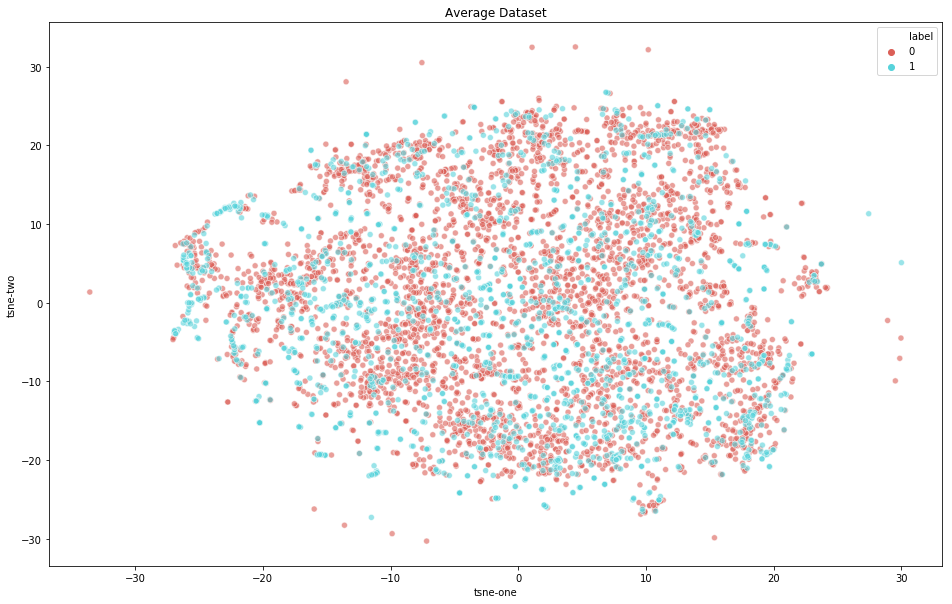

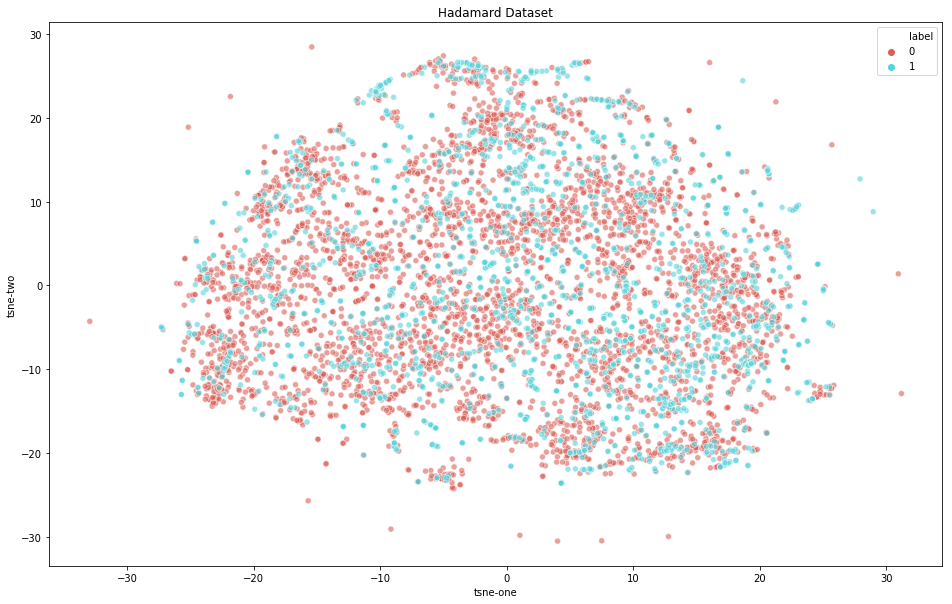

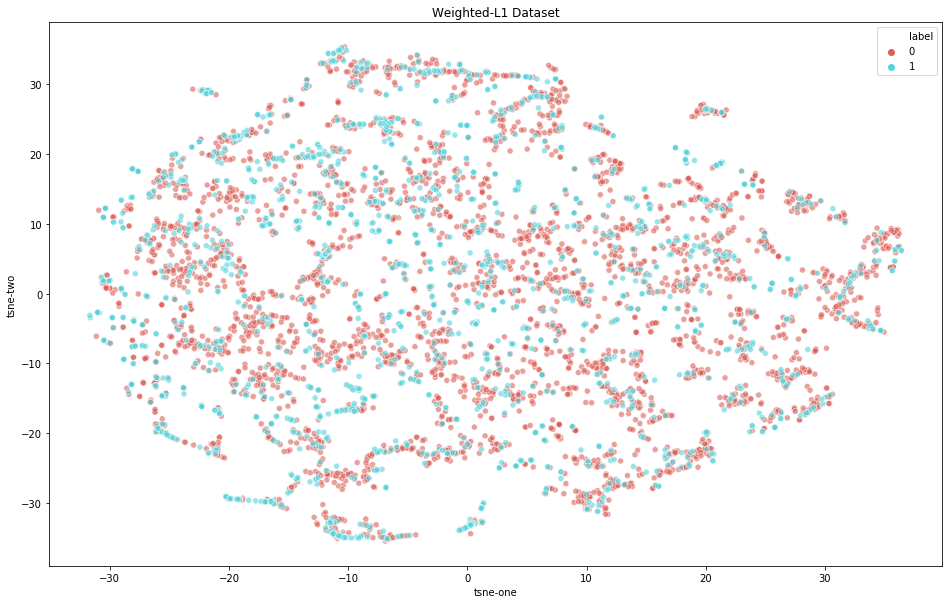

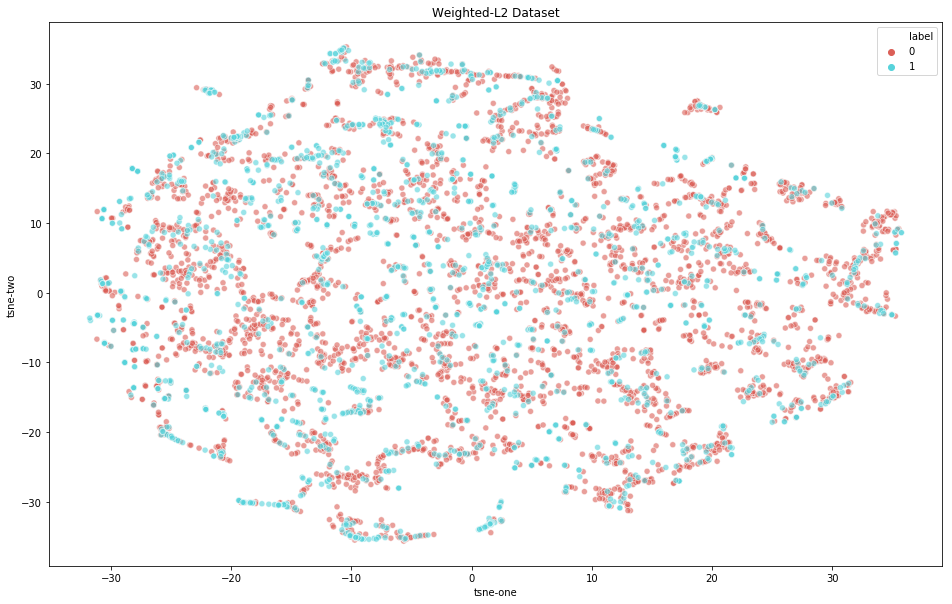

In [0]:
for n,df in zip(['Average','Hadamard','Weighted-L1','Weighted-L2'],[avgDF1,hadamardDF1,wl1DF1,wl2DF1]):
  print('Visualization '+n +' dataset: \n **************** ')
  time_start = time.time()
  tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=400)
  tsne_results = tsne.fit_transform(hadamardDF1.iloc[:,1:])
  print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
  df['tsne-one'] = tsne_results[:,0]
  df['tsne-two'] = tsne_results[:,1]
  plt.figure(figsize=(16,10))
  sns.scatterplot(
      x="tsne-one", y="tsne-two",
      hue="label",
      palette=sns.color_palette("hls", 2),
      data=df,
      legend='full',
      alpha=0.6,
       
  ).set_title(n+' Dataset')

